source:  
[ゼロから作るDeep Learning ―― Pythonで学ぶディープラーニングの理論と実装](https://www.oreilly.co.jp/books/9784873117584/)  
　斎藤 康毅　著  
　2016年09月 発行  
　ISBN978-4-87311-758-4  

---
###  ２章　パーセプトロン

２入力１出力の１層パーセプトロンを考える。  
入力を $x_{1}, x_{2}$ 、重みを $w_{1}, w_{2}$ 、出力を $y$ とする。  
$y$ は入力の合計が閾値 $\theta$ を超えた時に１、それ以外で０とする。  
すなわち

\begin{align*}
y = \begin{cases}
0 & (w_{1}x_{1}+w_{2}x_{2} \le \theta )\\
1 & (w_{1}x_{1}+w_{2}x_{2} > \theta )
\end{cases}　\tag{1}
\end{align*}

#### ANDゲート
上記のパーセプトロンを用いてANDゲートを作成する。   
真理値表は次の通り。

$x_{1}$ | $x_{2}$ | $y$
---|---|---
0|0|0
1|0|0
0|1|0
1|1|1

例えば $(w_{1}, w_{2}, \theta) = (0.5, 0.5, 0.9)$ はこれを満たす。

#### NANDゲート
同様に、NANDゲートの真理値表は次のようになる。

$x_{1}$ | $x_{2}$ | $y$
---|---|---
0|0|1
1|0|1
0|1|1
1|1|0

これの解としては $(w_{1}, w_{2}, \theta) = (-1, -1, -1.5)$ などがある。

#### ORゲート
ORゲートの真理値表は次のようになる。

$x_{1}$ | $x_{2}$ | $y$
---|---|---
0|0|0
1|0|1
0|1|1
1|1|1

解の１つは $(w_{1}, w_{2}, \theta) = (1, 1, 0.5)$ 。

#### 実装
式(1)を次のように変形して、 $b=-\theta$ とする。

\begin{align*}
y &= \begin{cases}
0 & (w_{1}x_{1}+w_{2}x_{2}-\theta \le 0 )\\
1 & (w_{1}x_{1}+w_{2}x_{2}-\theta > 0 )
\end{cases} \\
&= \begin{cases}
0 & (w_{1}x_{1}+w_{2}x_{2}+b \le 0 )\\
1 & (w_{1}x_{1}+w_{2}x_{2}+b > 0 )
\end{cases}　\tag{2}
\end{align*}

In [1]:
import numpy as np
import pandas as pd

class Perceptron_one_layer(object):
    def __init__(self,w,b):
        self.w, self.b = np.array(w), np.array(b)
    def output(self, x):
        input_sig = sum(self.w*x) + self.b
        output_sig = 0 if input_sig<=0 else 1
        return output_sig
    
AND_gate = Perceptron_one_layer((0.5, 0.5), -0.9)
NAND_gate = Perceptron_one_layer((-1,-1),1.5)
OR_gate = Perceptron_one_layer((1,1),-0.5)


inputs = [(0,0), (1,0), (0,1), (1,1)]
record = []
for i in inputs:
    r = i, AND_gate.output(i), NAND_gate.output(i), OR_gate.output(i)
    record.append(r)

df = pd.DataFrame(np.array(record), columns=["x1,x2","AND","NAND","OR"])
df

,"x1,x2",AND,NAND,OR
0,"(0, 0)",0,1,0
1,"(1, 0)",0,1,1
2,"(0, 1)",0,1,1
3,"(1, 1)",1,0,1


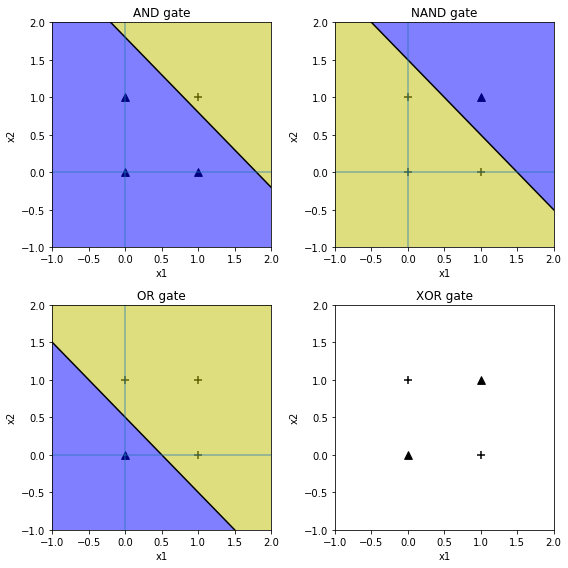

In [2]:
import matplotlib.pyplot as plt

def cal_line(w1,w2,b,x):
    y = []
    for i in x:
        y.append((-w1*i - b)/w2)
    return np.array(y)

def draw_point(gate,x1,x2):
    marker = "+" if gate.output((x1,x2))==1 else "^"
    #print(x1,x2,marker)
    return marker
    
def draw_graph(w1,w2,b,ax,name=""):
    x = np.arange(-3,3,0.01)
    y = cal_line(w1,w2,b,x)
    gate = Perceptron_one_layer((w1,w2),b)
    ax.plot(x,y,color="k")
    
    for point in [(0,0),(1,0),(0,1),(1,1)]:
        ax.scatter(point[0],point[1],color="black",marker = draw_point(gate,point[0],point[1]),s=60)
    ax.axhline(0,-3,3, alpha=.5)
    ax.axvline(0,-3,3, alpha=.5)
    facecolor = ["y","b"] if gate.output((1,1))==1 else ["b","y"]

    up_line=np.ones(x.shape)*2
    down_line=np.ones(x.shape)* -2
    ax.fill_between(x,y,up_line,facecolor=facecolor[0], alpha=.5)
    ax.fill_between(x,y,down_line,facecolor=facecolor[1], alpha=.5)
    
    ax.set_xlim(-1,2)
    ax.set_ylim(-1,2)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(name)
    
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(8,8))
draw_graph(0.5,0.5,-0.9,ax1,"AND gate")
draw_graph(-1,-1,1.5,ax2,"NAND gate")
draw_graph(1,1,-0.5,ax3,"OR gate")

for x,y in [(0,0),(1,0),(0,1),(1,1)]:
    ax4.scatter(x,y,color="black",marker = "^" if x==y else "+", s=60)
ax4.set_xlim(-1,2)
ax4.set_ylim(-1,2)
ax4.set_xlabel("x1")
ax4.set_ylabel("x2")
ax4.set_title("XOR gate")

plt.tight_layout()
plt.show()

上のグラフで、  
　$+$ および黄色の領域は $w_{1}x_{1}+w_{2}x_{2}-\theta > 0$、  
　$\triangle$ および青色の領域は $w_{1}x_{1}+w_{2}x_{2}-\theta \le 0$ である。

---

#### XORゲート
XORゲートの真理値表は次のようになる。  

$x_{1}$ | $x_{2}$ | $y$
---|---|---
0|0|0
1|0|1
0|1|1
1|1|0

これを上記３種のゲートのように、１層パーセプトロンによって実装することはできない。  
（XOR gateのグラフに表示されているマーカー２種を、１本の直線によって分離することができない）  

<実装>  
　AND、NAND、ORのゲートを組み合わせて実装する。  
　これは２層のパーセプトロンとなる。  

In [3]:
import numpy as np
import pandas as pd

AND_gate = Perceptron_one_layer((0.5, 0.5), -0.9)
NAND_gate = Perceptron_one_layer((-1,-1),1.5)
OR_gate = Perceptron_one_layer((1,1),-0.5)

def XOR(x):
    output_1 = NAND_gate.output((x[0],x[1])) , OR_gate.output((x[0],x[1]))
    return(AND_gate.output(output_1))

inputs = [(0,0), (1,0), (0,1), (1,1)]
record = []
for i in inputs:
    r = i, XOR(i)
    record.append(r)

df = pd.DataFrame(np.array(record), columns=["x1,x2","XOR"])
df

,"x1,x2",XOR
0,"(0, 0)",0
1,"(1, 0)",1
2,"(0, 1)",1
3,"(1, 1)",0


---
###  3章　ニューラルネットワーク

入力n個、出力1個の１層パーセプトロンを考える。  
入力を $X = (x_{1}, x_{2},\dots, x_{n})$、重みを $W = (w_{1}, w_{2}, \dots, w_{n})$、バイアスを $b$、出力を $y$ と表記する。  
　（ここで $X$、$W$ は列ベクトル）  
また、出力ノードへの入力値を $a$、活性化関数を $h$ とする。  
  
このとき、  
\begin{align*}
a &= W^{\mathrm{T}}X + b \\
y &= h(a)
\end{align*}
である。

よく用いられる活性化関数の１つは、シグモイド関数である。  
\begin{align*}
h(x) = \frac{1}{1 + \exp(-x)}
\end{align*}

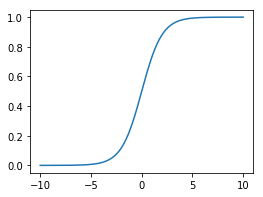

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import log

def sigmoid(x):
    #sigmoid_range = log((1 - 10**(-15))/10**(-15)) # 浮動小数点エラー対策
    #if x <= -sigmoid_range:
    #    return 1e-15
    #if x >= sigmoid_range:
    #    return 1.0 - 1e-15
    return 1.0 / (1.0 + np.exp(-x))
    
x = np.arange(-10,10,0.01)
y = sigmoid(x)
plt.figure(figsize=(4,3))
plt.plot(x,y)
plt.show()

他の例として、ReLU (Rectified Linear Unit)がある。
\begin{align*}
h(x) = \begin{cases}
x & (x>0) \\
0 & (x \leq0)
\end{cases}
\end{align*}

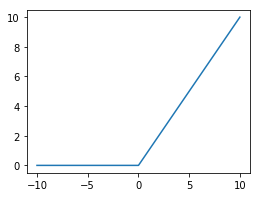

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    output = np.piecewise(x, [x<=0, x>0], [0, lambda x:x])
    return output

x = np.arange(-10,10,0.01)
y = relu(x)
plt.figure(figsize=(4,3))
plt.plot(x,y)
plt.show()

---
１層パーセプトロンを入力n個、出力m個に拡張し、出力を $Y = (y_{1}, y_{2}, \dots, y_{m})$ と表す。  
このときそれぞれの出力について  

\begin{align*}
a_{i} &= W^{\mathrm{T}}_{i}X + b_{i} \\
y_{i} &= h(a_{i})
\end{align*}

の計算を行うので、全体としての重みWは $(n\times m)$ 行列、バイアス $b$ は列ベクトルとなる。    

In [6]:
import numpy as np

def relu(x):
    output = np.piecewise(x, [x<=0, x>0], [0, lambda x:x])
    return np.array(output)

class Perceptron_layer(object):
    def __init__(self,input_size, output_size, W=None, b=None, initial_v=1e-4):
        self.W = np.random.rand(input_size, output_size) * initial_v if W is None else W
        self.b = np.zeros(output_size) if b is None else b
        
    def output(self, X):
        return np.dot(self.W.transpose(),X) + self.b
        

# 検算用
layer_1 = Perceptron_layer(3,2,W=np.array([[1,2],[3,4],[5,6]]),b=np.array([1,2]))
output_1 = layer_1.output(np.array([2,3,4]).transpose())
print(output_1)
print(relu(output_1))

[32 42]
[32 42]


本の記述に従った値と構成を用いて、3層のパーセプトロンを実装する。

層|入力数|出力数|活性化関数
:-:|:-:|:-:|:---
1|2|3|Sigmoid
2|3|2|Sigmoid
3|2|2|Identity function

In [7]:
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

layer_1 = Perceptron_layer(2,3,W1,b1)
layer_2 = Perceptron_layer(3,2,W2,b2)
layer_3 = Perceptron_layer(2,2,W3,b3)

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def forward(X):
    output_1 = sigmoid(layer_1.output(X))
    output_2 = sigmoid(layer_2.output(output_1))
    output_3 = layer_3.output(output_2)
    return output_3


X = np.array([1.0,0.5])
Y = forward(X)
print(Y)

[ 0.31682708  0.69627909]
